<a href="https://www.kaggle.com/code/goyalharshit/mutual-funds?scriptVersionId=290768335" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv")

In [3]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [4]:
df.shape

(814, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [6]:
#changing the dtype of some cols from object to float
df = df.drop(["scheme_name", "fund_manager", "amc_name"], axis = 1)
df = df.replace("-", 0)
df = df.astype({"sortino": float, "alpha": float, "sd": float, "beta": float, "sharpe":float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_sip        814 non-null    int64  
 1   min_lumpsum    814 non-null    int64  
 2   expense_ratio  814 non-null    float64
 3   fund_size_cr   814 non-null    float64
 4   fund_age_yr    814 non-null    int64  
 5   sortino        814 non-null    float64
 6   alpha          814 non-null    float64
 7   sd             814 non-null    float64
 8   beta           814 non-null    float64
 9   sharpe         814 non-null    float64
 10  risk_level     814 non-null    int64  
 11  rating         814 non-null    int64  
 12  category       814 non-null    object 
 13  sub_category   814 non-null    object 
 14  returns_1yr    814 non-null    float64
 15  returns_3yr    793 non-null    float64
 16  returns_5yr    647 non-null    float64
dtypes: float64(10), int64(5), object(2)
memory usage: 108.

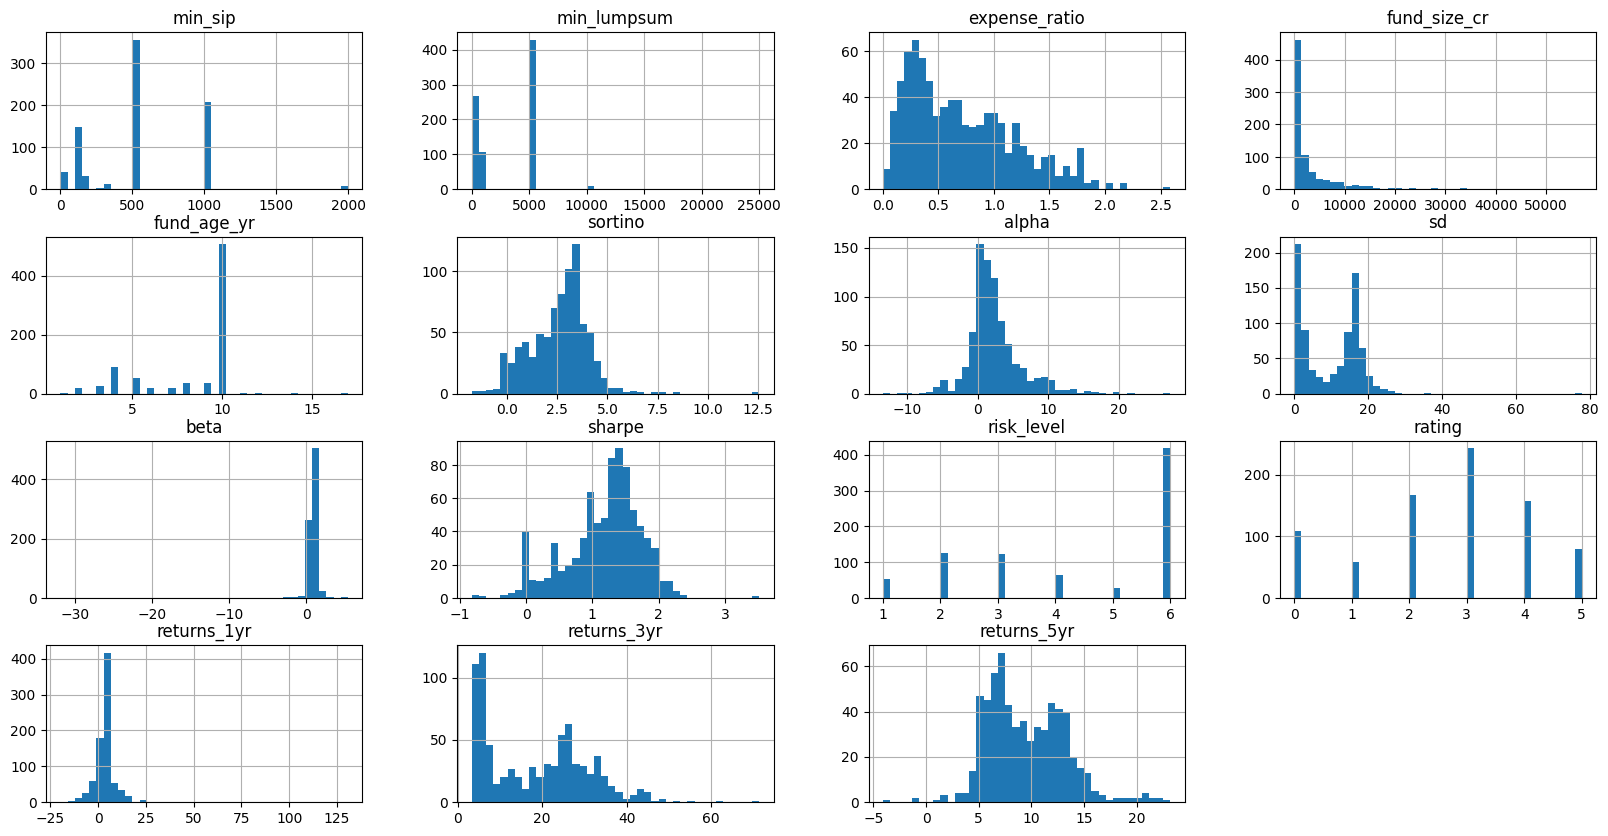

In [7]:
#plotting the distribution of all the numerical cols of the data
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols, len(num_cols)

fig, ax = plt.subplots(figsize = (20,10))
df[num_cols].hist(ax = ax, bins = 40)
plt.show()

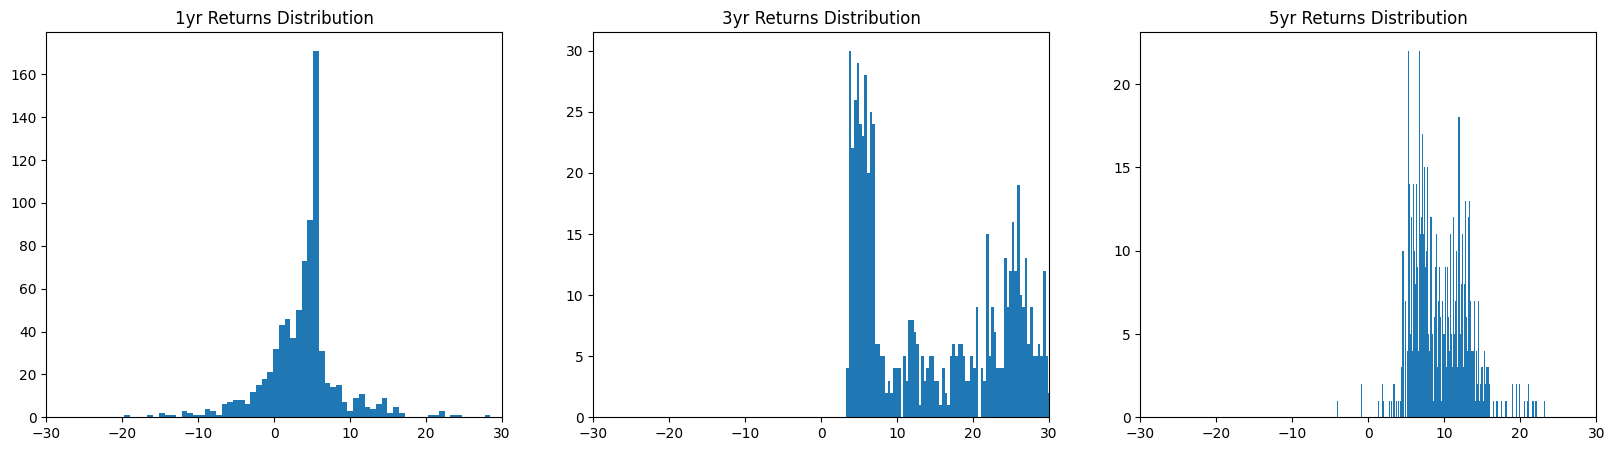

In [8]:
#plotting "returns" seperately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

ax1.hist(df["returns_1yr"], bins = 200)
ax1.set_xlim(-30, 30)
ax1.set_title("1yr Returns Distribution")

ax2.hist(df["returns_3yr"], bins = 200)
ax2.set_xlim(-30, 30)
ax2.set_title("3yr Returns Distribution")

ax3.hist(df["returns_5yr"], bins = 200)
ax3.set_xlim(-30, 30)
ax3.set_title("5yr Returns Distribution")


plt.show()

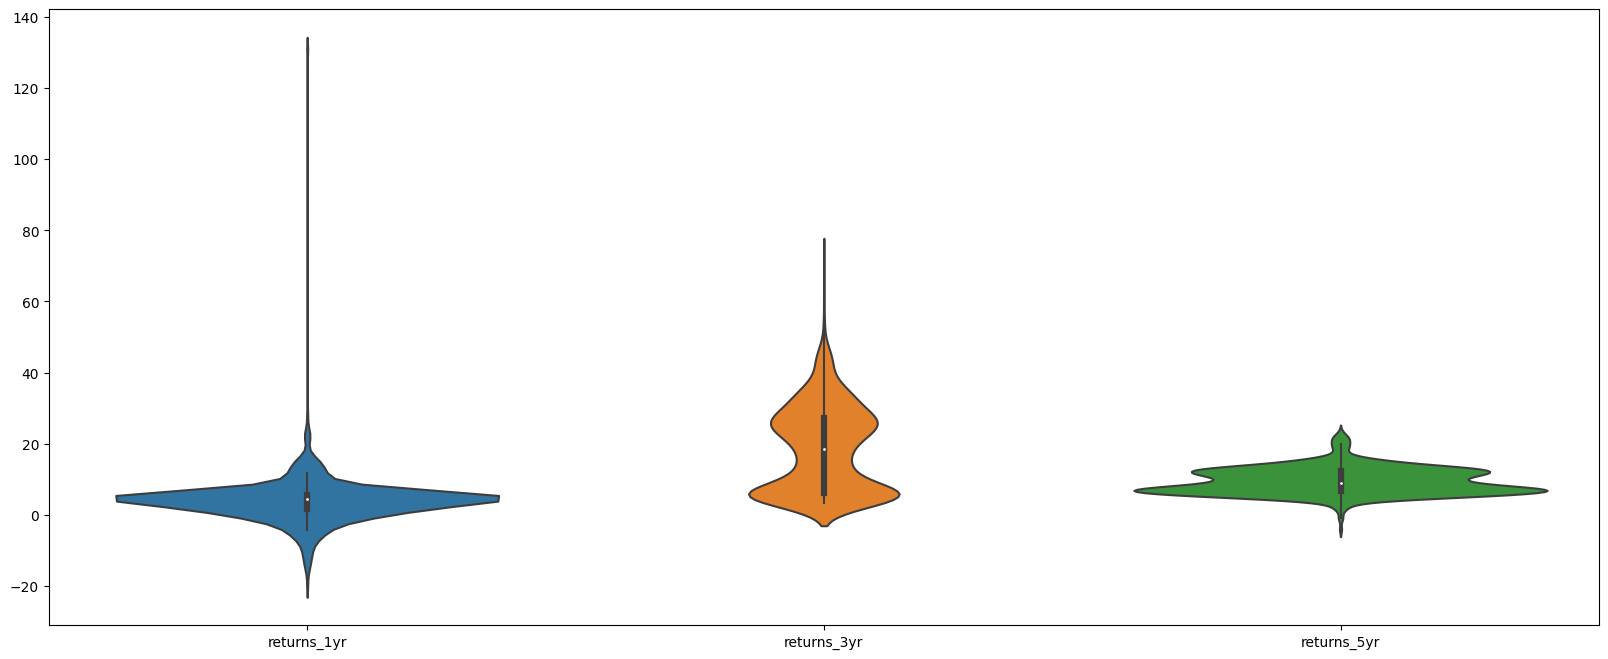

In [9]:
#Violit plots of all the returns
plt.figure(figsize = (20,8))
sns.violinplot(df[["returns_1yr", "returns_3yr", "returns_5yr"]])
plt.show()

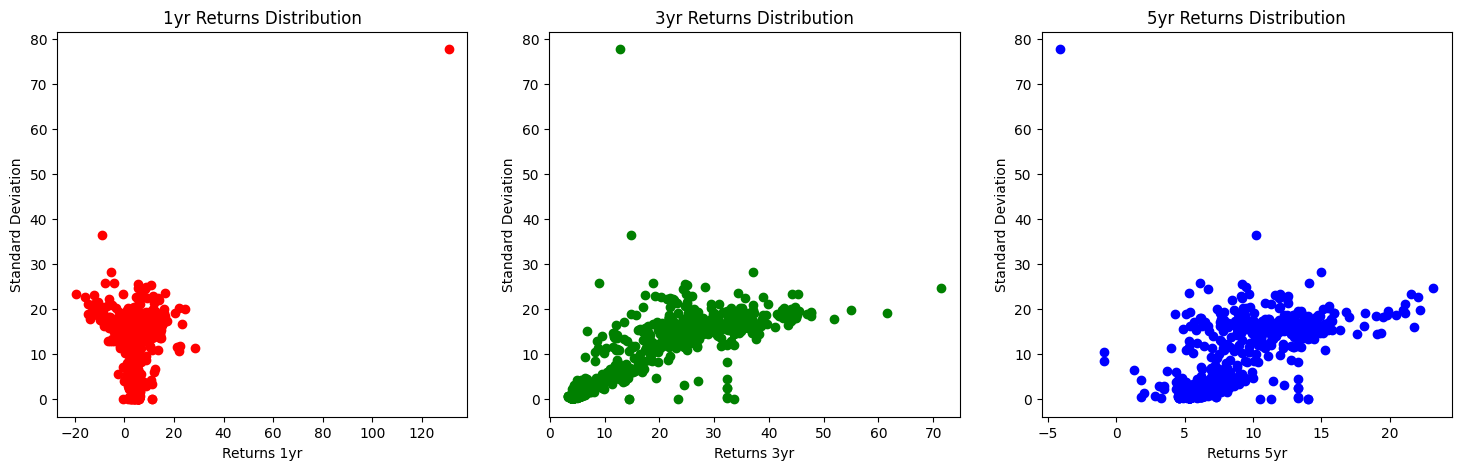

In [10]:
#plotting "returns" seperately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))

ax1.scatter(df["returns_1yr"], df["sd"], color = "r")
ax1.set_xlabel("Returns 1yr")
ax1.set_ylabel("Standard Deviation")
ax1.set_title("1yr Returns Distribution")

ax2.scatter(df["returns_3yr"], df["sd"], color = "g")
ax2.set_xlabel("Returns 3yr")
ax2.set_ylabel("Standard Deviation")
ax2.set_title("3yr Returns Distribution")

ax3.scatter(df["returns_5yr"], df["sd"], color = "b")
ax3.set_xlabel("Returns 5yr")
ax3.set_ylabel("Standard Deviation")
ax3.set_title("5yr Returns Distribution")


plt.show()

## Some Conclusions according to me
> * There seems to be one outlier in all the three returns
> * 1 yr returns are very clearly following a normal distribution.
> * 3 yr returns are all positive, this might be due to the relatively longer term or the overall economy being good

In [11]:
# Lets first drop the outlier and again plot the scatters
outlier = df[df["sd"] > 70]
outlier

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
89,0,5000,1.54,161.0,8,0.91,-13.36,77.72,-31.86,0.38,4,5,Debt,Credit Risk Funds,130.8,12.8,-4.1


### Although,this is an amazing case for us to see when the standard deviation in the security is huge, how much the returns can varry over time. In this case, 
> $\sigma = 77.72$ 
> Therefore, returns are varying from 130.8 in the first year to 12.8 in the second and -4.1 in the third

## Lets plot again after removing the outlier

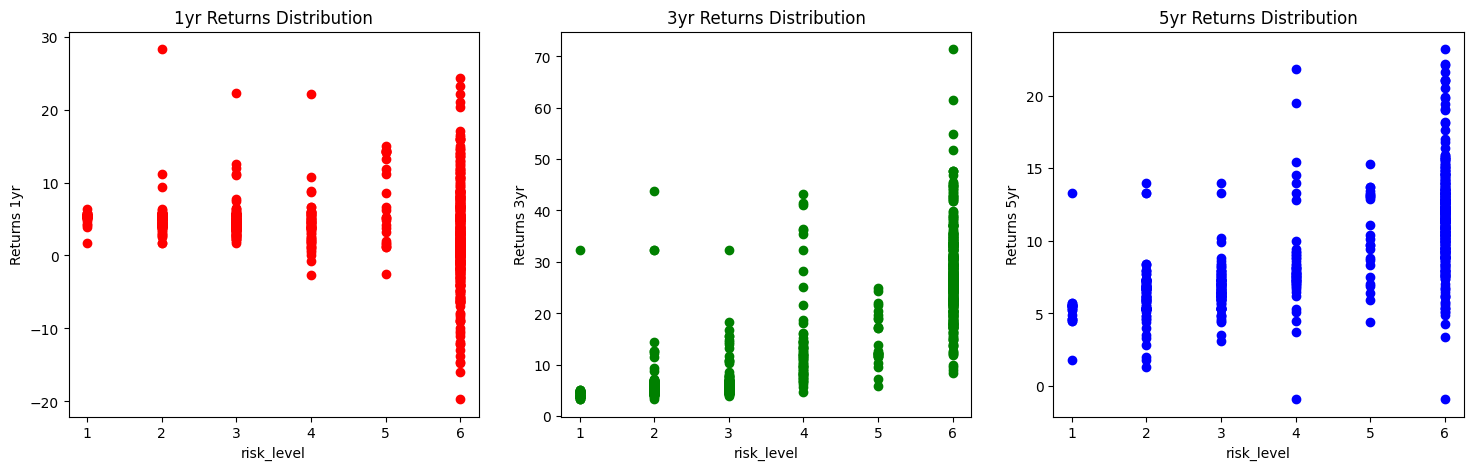

In [12]:
#plotting "returns" seperately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))

against = "risk_level"

ax1.scatter(y = df.drop(df.iloc[89].name)["returns_1yr"], x = df.drop(df.iloc[89].name)[against], color = "r")
ax1.set_ylabel("Returns 1yr")
ax1.set_xlabel(against)
ax1.set_title("1yr Returns Distribution")

ax2.scatter(y = df.drop(df.iloc[89].name)["returns_3yr"], x = df.drop(df.iloc[89].name)[against], color = "g")
ax2.set_ylabel("Returns 3yr")
ax2.set_xlabel(against)
ax2.set_title("3yr Returns Distribution")

ax3.scatter(y = df.drop(df.iloc[89].name)["returns_5yr"],x = df.drop(df.iloc[89].name)[against], color = "b")
ax3.set_ylabel("Returns 5yr")
ax3.set_xlabel(against)
ax3.set_title("5yr Returns Distribution")


plt.show()

### In this plot of returns against the risk level of the fund, it can clearly be seen that with higher risk, there is a possibility of higher returns, but it comes draped with the possibility of losing money as well
> ####  In the 1st plot, we see the higher risk (ie. 6) MF's have even given a negative return of 20 %

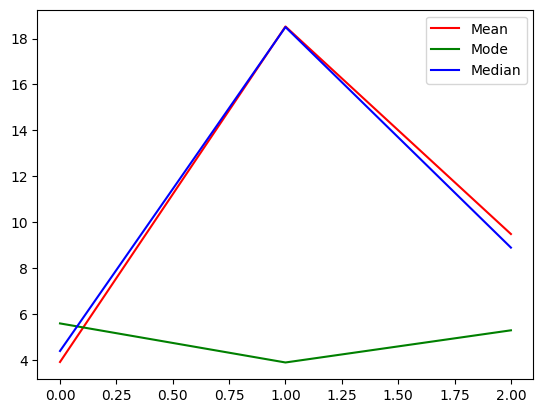

In [13]:
plt.plot([df["returns_1yr"].mean(), df["returns_3yr"].mean() , df["returns_5yr"].mean()], "r", label = "Mean")
plt.plot([df["returns_1yr"].mode(), df["returns_3yr"].mode() , df["returns_5yr"].mode()], "g", label = "Mode")
plt.plot([df["returns_1yr"].median(), df["returns_3yr"].median() , df["returns_5yr"].median()], "b", label = "Median")

plt.legend()

plt.show()

In [14]:
df["sd"].mean()

9.969815724815724

In [15]:
#lets ch.aggck the means of the returns
for i in ["1","3", "5"]:
    col = "returns_"+i+"yr"
    print(f"Mean of Returns over {i} years is: {df[col].mean()}\nStd Dev is: {df[col].var() ** 0.5}\nMode is: {df[col].mode()}\n")

Mean of Returns over 1 years is: 3.921375921375921
Std Dev is: 6.675501654239483
Mode is: 0    5.6
Name: returns_1yr, dtype: float64

Mean of Returns over 3 years is: 18.525346784363176
Std Dev is: 12.1084764809175
Mode is: 0    3.9
Name: returns_3yr, dtype: float64

Mean of Returns over 5 years is: 9.490726429675425
Std Dev is: 3.7140150344091793
Mode is: 0    5.3
Name: returns_5yr, dtype: float64



### The variance (basically risk) should decrease over longer periods ie. 3yrs in this case, but here it has increased significantly. 

### Lets explore the correlations among various columns.
#### Some things I hypothesize beforehand - 
* Alpha, Sharpe and Sortino will have a high correlation with Beta
* Simillarly Rating should show some level of Correlation with Returns
* Standard Deviation should have high correlation with Risk adjusted measures of returns (sortino, alpha) and beta.
* Risk level with returns will have a high $+ve$ corr as well, because more the risk, more the expectation of returns.

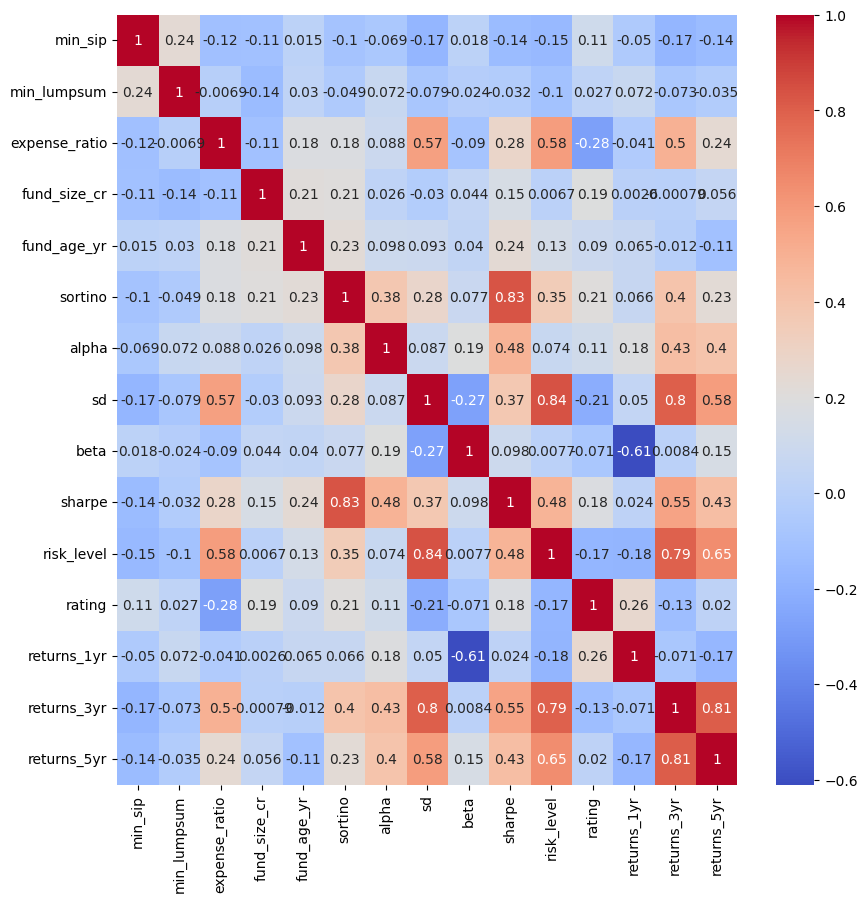

In [16]:
corr = df.select_dtypes(include=["float", "int"]).corr()
#plotting the correlation heatmap

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

### A couple of observations:
### 1) Corrupt Assumptions
> * Standard Deviation (common measurement of risk) has a high correlation with returns and risk-adjusted return measurements. 
> * Risk also has a huge bearing on returns. This is also seen in the plot of Risk Level against returns above.
### 2) Assumptions that proved to be wrong
> * Rating has little to no bearing on returns, which also proves that although ratings of securities affect their popularity, but if the fundamentals are strong, ratings dont matter.
> * Beta is not having high corr with risk adjusted measures of return either.
### 3) Some other observations.
> * Among $\beta$ and $\sigma$, $\sigma$ has higher corr with all of the return measures as well as risk level.
> * Beta $\beta$ has a high $-ve$ correlation with 1yr Returns.

## Lets Model the data and try to predict the returns of stock over the 3 and 5 year time frames

In [17]:
#drop the columns, where 5 yr returns are not available
df_tomodel = df.dropna(axis = 0)
df_tomodel.shape

(647, 17)

In [18]:
y = df_tomodel[["returns_3yr", "returns_5yr"]]
x = df_tomodel.drop(["returns_5yr", "returns_3yr", "category", "sub_category"], axis = 1)

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)
print(f"Traning Data: {x_train.shape}, {y_train.shape}\n Validation Data: {x_val.shape}, {y_val.shape} \n Test Data: {x_test.shape}, {y_test.shape}")

Traning Data: (517, 13), (517, 2)
 Validation Data: (104, 13), (104, 2) 
 Test Data: (26, 13), (26, 2)


In [189]:
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)

### Here, we are trying a simple ANN, with two output columns, because we need two different outputs for the data.
> The model, will have to be simple because the data is not too complex, so in order to avoid overfitting, we will use simpler networks

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [23]:
#Converting the data into tensors.

train_features = torch.tensor(x_train_norm, dtype = torch.float32)
train_target = torch.tensor(y_train.to_numpy(), dtype = torch.float32)


val_features = torch.tensor(x_val_norm, dtype = torch.float32)
val_target = torch.tensor(y_val.to_numpy(),dtype = torch.float32)

test_features = torch.tensor(x_test_norm,dtype = torch.float32)
test_target = torch.tensor(y_test.to_numpy(), dtype = torch.float32)

print(f"Traning Data: {train_features.shape}, {train_target.shape}\n Validation Data: {val_features.shape}, {val_target.shape} \n Test Data: {test_features.shape}, {test_target.shape}")

Traning Data: torch.Size([517, 13]), torch.Size([517, 2])
 Validation Data: torch.Size([104, 13]), torch.Size([104, 2]) 
 Test Data: torch.Size([26, 13]), torch.Size([26, 2])


In [24]:
# creating data sets
train = TensorDataset(train_features,train_target)
val = TensorDataset(val_features, val_target)
test = TensorDataset(test_features,test_target)

In [25]:
#defining the model
class CreditModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CreditModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.prelu1 = nn.PReLU(num_parameters = 1)
        self.fc2 = nn.Linear(hidden_size, int(hidden_size / 2))
        self.prelu2 = nn.ReLU()
        self.fc3 = nn.Linear(int(hidden_size / 2), output_size)
    def forward(self, x):
        x = self.fc1(x)
        x = self.prelu1(x)
        x = self.fc2(x)
        x = self.prelu2(x)
        x = self.fc3(x)
        return x

In [26]:
#setting up the gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [27]:
#Initialising the model
input_size = train_features.shape[1]  # Number of input features
hidden_size = 26 
output_size = 2  # Two output variables

model = CreditModel(input_size, hidden_size, output_size)

#moving the model to the gpu
model = model.to(device)
print(model)

CreditModel(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (prelu1): PReLU(num_parameters=1)
  (fc2): Linear(in_features=26, out_features=13, bias=True)
  (prelu2): ReLU()
  (fc3): Linear(in_features=13, out_features=2, bias=True)
)


In [28]:
#setting some of the other hyperparams
iterations = 10000
batch_size = 100
epochs = int(iterations/(int(train_features.shape[0])/batch_size))
print(f"epochs: {epochs}")

# Cross Entropy Loss 
error = nn.MSELoss()

# SGD Optimizer
alpha = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=alpha)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val, batch_size = val_features.shape[0], shuffle = True)
test_loader = DataLoader(test, batch_size = test_features.shape[0], shuffle = True)

epochs: 1934


In [29]:
count = 0
loss_list = []
iterations = []
pev_list = []

for epoch in range(epochs):
    for train_feature, ground_truth_train in train_loader:
        
        #moving the batch to GPU
        train_feature, ground_truth_train = train_feature.to(device), ground_truth_train.to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        y_hat_train = model(train_feature)
        
        # Calculate loss`
        weight = 0.4  # Relative weight for the first output
        loss = weight * error(y_hat_train[:,0], ground_truth_train[:,0]) + (1. - weight) * error(y_hat_train[:,1], ground_truth_train[:,1])
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        #for every 100 epochs, we will calculate the validation accuracy
        if count % 100 == 0:
            pev = 1.0 - (torch.var(ground_truth_train - y_hat_train) / torch.var(ground_truth_train))

            loss_list.append(loss.data)
            iterations.append(count)
            pev_list.append(pev)
            if count%500 == 0:
                
                print(f"Iterations: {count} Training_loss: {loss.data} PEV:{pev} ")
                

Iterations: 500 Training_loss: 244.1291046142578 PEV:0.0417061448097229 
Iterations: 1000 Training_loss: 101.5864486694336 PEV:0.17669308185577393 
Iterations: 1500 Training_loss: 30.240970611572266 PEV:0.4299055337905884 
Iterations: 2000 Training_loss: 46.472190856933594 PEV:0.4536799192428589 
Iterations: 2500 Training_loss: 33.049930572509766 PEV:0.5168160200119019 
Iterations: 3000 Training_loss: 34.301300048828125 PEV:0.5795332193374634 
Iterations: 3500 Training_loss: 38.73919677734375 PEV:0.5571079850196838 
Iterations: 4000 Training_loss: 26.525409698486328 PEV:0.6613730192184448 
Iterations: 4500 Training_loss: 25.528732299804688 PEV:0.6816539764404297 
Iterations: 5000 Training_loss: 32.925960540771484 PEV:0.6306082010269165 
Iterations: 5500 Training_loss: 19.566476821899414 PEV:0.7861435413360596 
Iterations: 6000 Training_loss: 20.964927673339844 PEV:0.8002892732620239 
Iterations: 6500 Training_loss: 16.182994842529297 PEV:0.8044480085372925 
Iterations: 7000 Training_lo

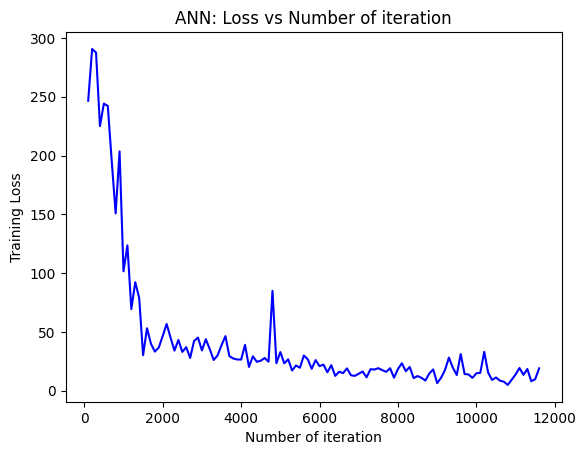

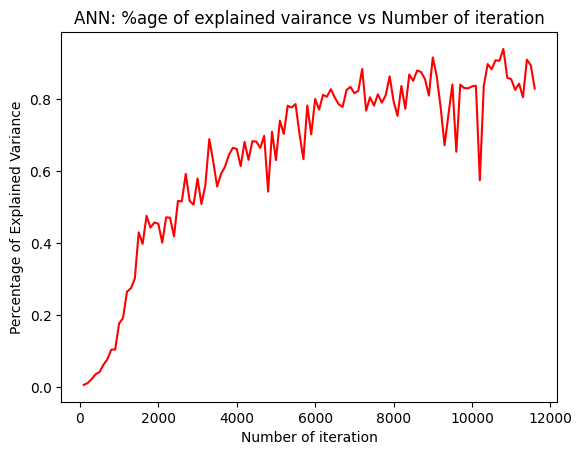

In [30]:
#tconverting into tensors to be able to plot
loss_list_ = torch.tensor(loss_list, dtype=torch.float32).numpy()
pev_list_ = torch.tensor(pev_list, dtype=torch.float32).numpy()
iterations_ = torch.tensor(iterations, dtype = torch.float32).numpy()
# visualization loss 
plt.plot(iterations_, loss_list_, color = "blue")
plt.xlabel("Number of iteration")
plt.ylabel("Training Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iterations_, pev_list_,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Percentage of Explained Variance")
plt.title("ANN: %age of explained vairance vs Number of iteration")
plt.show()

In [31]:
#checking on validation set
for val_feature, ground_truth_val in val_loader:
    val_feature, ground_truth_val = val_feature.to(device), ground_truth_val.to(device)
    y_hat_val = model(val_feature) #calculating the outputs for validation set
    weight = 0.3  # Relative weight for the first output
    loss_val = weight * error(y_hat_val[:,0], ground_truth_val[:,0]) + (1. - weight) * error(y_hat_val[:,1], ground_truth_val[:,1])
        

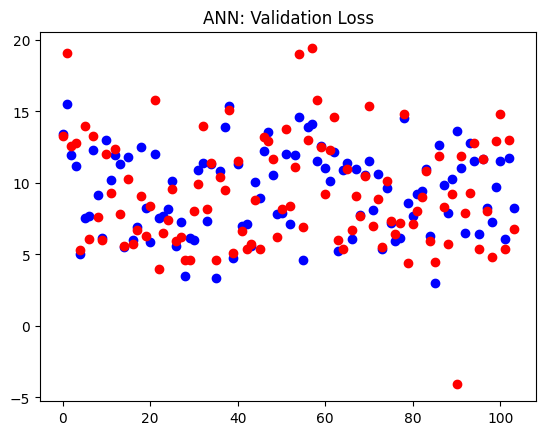

In [32]:
#converting into tensors to be able to plot
y_hat_val_ = torch.tensor(y_hat_val.data, dtype=torch.float32).cpu().numpy()
# yhat_val = y_hat_tensor.cpu().numpy()
ground_truth_val_ = ground_truth_val.cpu().numpy()


plt.scatter(range(len(y_hat_val)), y_hat_val_[:,1], color = "blue")
plt.scatter(range(len(ground_truth_val_)), ground_truth_val_[:,1], color = "red")
# plt.plot(ground_truth, color = "red")
# plt.xlabel("Number of iteration")
# plt.ylabel("Training Loss")
plt.title("ANN: Validation Loss")
plt.show()


In [33]:
#validation loss
loss_val

tensor(10.9566, device='cuda:0', grad_fn=<AddBackward0>)

### Since Validation loss is still high for this problem, I am going to try a grid search for hyperparameter tuning

In [34]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 6.2 MB/s eta 0:00:0000:01


In [35]:
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetRegressor

In [36]:
param_grid = {
    'module__input_size': [13],
    'module__output_size': [2],
    'module__hidden_size': [26, 52, 104],
    'batch_size': [50, 100, 150],
    "iterator_train": [10000,20000,30000],
    'max_epochs': [1000, 2000, 3000],
    'lr': [0.001, 0.01, 0.1]
}

In [37]:
model = NeuralNetRegressor(module=CreditModel, max_epochs=3000, lr=0.001)
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_norm, y_train)

ValueError: 
All the 1215 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/skorch/regressor.py", line 85, in fit
    return super(NeuralNetRegressor, self).fit(X, y, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/skorch/net.py", line 1336, in fit
    self.partial_fit(X, y, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/skorch/net.py", line 1295, in partial_fit
    self.fit_loop(X, y, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/skorch/net.py", line 1199, in fit_loop
    iterator_train = self.get_iterator(dataset_train, training=True)
  File "/opt/conda/lib/python3.10/site-packages/skorch/net.py", line 1841, in get_iterator
    return iterator(dataset, **kwargs)
TypeError: 'int' object is not callable


### Okay, this did'nt work out

## Lets try running the grid search using the gool old for loops

In [41]:
def model_train(model, train_loader, val_loader, epochs, optimizer, error, device):
    
    for epoch in range(epochs):
        for train_feature, ground_truth_train in train_loader:

            #moving the batch to GPU
            train_feature, ground_truth_train = train_feature.to(device), ground_truth_train.to(device)

            # Clear gradients
            optimizer.zero_grad()

            # Forward propagation
            y_hat_train = model(train_feature)

            # Calculate loss
            weight = 0.4  # Relative weight for the first output
            loss = weight * error(y_hat_train[:,0], ground_truth_train[:,0]) + (1. - weight) * error(y_hat_train[:,1], ground_truth_train[:,1])

            # Calculate gradients
            loss.backward()

            # Update parameters
            optimizer.step()
            
    print(f"****Training Finished****")
    
    loss_val = val_loss_cal(model, val_loader)        
    return model, loss, loss_val
    

In [42]:
def val_loss_cal(model_recd, val_loader):
    #checking on validation set
    for val_feature, ground_truth_val in val_loader:
        val_feature, ground_truth_val = val_feature.to(device), ground_truth_val.to(device)
        y_hat_val = model_recd(val_feature) #calculating the outputs for validation set
        weight = 0.4  # Relative weight for the first output
        loss_val = weight * error(y_hat_val[:,0], ground_truth_val[:,0]) + (1. - weight) * error(y_hat_val[:,1], ground_truth_val[:,1])
    return loss_val

### Heirarchy - 
> Iterations
>> Batch Size
>>>Epochs
>>>>Learning Rate
>>>>>Hidden Size

In [43]:
iterations_list = [10000,15000, 20000]
batch_size_list = [50,100, 150]
learning_rate_list = [0.001, 0.003, 0.01]
hidden_size_list = [26, 52, 104]
# Cross Entropy Loss 
error_ = nn.MSELoss()

# data loader
val_loader = DataLoader(val, batch_size = val_features.shape[0], shuffle = True)

In [44]:
results = []
#differing the iterations
for iterations in iterations_list:
    
    #differing the batch size
    for batch_size in batch_size_list:
        
        # data loader
        train_loader_ = DataLoader(train, batch_size = batch_size, shuffle = True)
        
        #calculating respective epochs
        epochs_ = int(iterations/(int(train_features.shape[0])/batch_size))
        
        #differing the hidden size
        for hidden_size in hidden_size_list:
            
                #Instatiate the model
                model_ = CreditModel(input_size, hidden_size, output_size)
                
                #moving the model to the gpu
                model_ = torch.nn.DataParallel(model_, device_ids = [0,1]).to(device)
                
                for lr in learning_rate_list:
                    optimizer_ = torch.optim.Adam(model_.parameters(), lr)
                
    #                 training with these hyperparameters
                    trained_model, loss_train, loss_val = model_train(model_, train_loader_, val_loader, epochs_, optimizer_, error_, device)

                    #append to the results list
                    results.append({"Iterations": iterations, "Batch Size": batch_size, "Hidden Size": hidden_size, "Learning Rate": lr, "Training Loss": loss_train, "Validation Loss": loss_val})
                    print(f"The hyperparams in this training were: Iterations: {iterations}, Batch Size: {batch_size}, Hidden Size: {hidden_size}, Learning Rate: {lr}, Training Loss : {loss_train}, Validation Loss: {loss_val}")
                

****Training Finished****
The hyperparams in this training were: Iterations: 10000, Batch Size: 50, Hidden Size: 26, Learning Rate: 0.001, Training Loss : 2.7038521766662598, Validation Loss: 7.516695976257324
****Training Finished****
The hyperparams in this training were: Iterations: 10000, Batch Size: 50, Hidden Size: 26, Learning Rate: 0.003, Training Loss : 5.228715896606445, Validation Loss: 24.531980514526367
****Training Finished****
The hyperparams in this training were: Iterations: 10000, Batch Size: 50, Hidden Size: 26, Learning Rate: 0.01, Training Loss : 1.3430745601654053, Validation Loss: 10.918488502502441
****Training Finished****
The hyperparams in this training were: Iterations: 10000, Batch Size: 50, Hidden Size: 52, Learning Rate: 0.001, Training Loss : 3.2322113513946533, Validation Loss: 8.604839324951172
****Training Finished****
The hyperparams in this training were: Iterations: 10000, Batch Size: 50, Hidden Size: 52, Learning Rate: 0.003, Training Loss : 3.760

In [88]:
results_df = pd.DataFrame(results)
results_df.head()

,Iterations,Batch Size,Hidden Size,Learning Rate,Training Loss,Validation Loss
0,10000,50,26,0.001,"tensor(2.7039, device='cuda:0', grad_fn=<AddBa...","tensor(7.5167, device='cuda:0', grad_fn=<AddBa..."
1,10000,50,26,0.003,"tensor(5.2287, device='cuda:0', grad_fn=<AddBa...","tensor(24.5320, device='cuda:0', grad_fn=<AddB..."
2,10000,50,26,0.010,"tensor(1.3431, device='cuda:0', grad_fn=<AddBa...","tensor(10.9185, device='cuda:0', grad_fn=<AddB..."
3,10000,50,52,0.001,"tensor(3.2322, device='cuda:0', grad_fn=<AddBa...","tensor(8.6048, device='cuda:0', grad_fn=<AddBa..."
4,10000,50,52,0.003,"tensor(3.7604, device='cuda:0', grad_fn=<AddBa...","tensor(64.7517, device='cuda:0', grad_fn=<AddB..."


In [89]:
results_df["Training Loss"] = [i.cpu().detach().numpy() for i in results_df["Training Loss"]]
results_df["Validation Loss"] = [i.cpu().detach().numpy() for i in results_df["Validation Loss"]]

In [90]:
results_df

,Iterations,Batch Size,Hidden Size,Learning Rate,Training Loss,Validation Loss
0,10000,50,26,0.001,2.7038522,7.516696
1,10000,50,26,0.003,5.228716,24.53198
2,10000,50,26,0.010,1.3430746,10.9184885
3,10000,50,52,0.001,3.2322114,8.604839
4,10000,50,52,0.003,3.7604134,64.751686
...,...,...,...,...,...,...
76,20000,150,52,0.003,0.66871536,43.506084
77,20000,150,52,0.010,0.37521648,37.531975
78,20000,150,104,0.001,1.3062962,78.50833
79,20000,150,104,0.003,0.2592398,73.93235


### Plotting the Training Loss vs Validation Loss

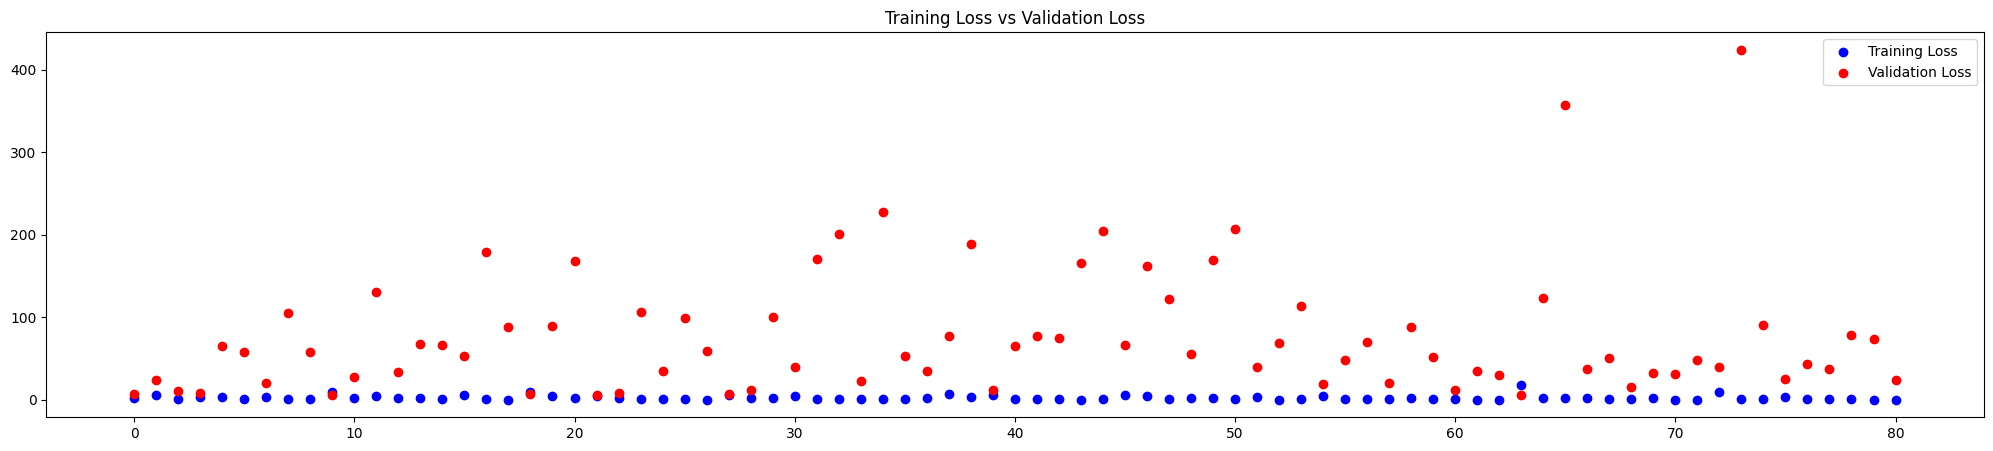

In [91]:
plt.subplots(figsize = (25,5))
plt.scatter(range(len(results_df["Training Loss"])), results_df["Training Loss"], color = 'b', label = "Training Loss")
plt.scatter(range(len(results_df["Validation Loss"])), results_df["Validation Loss"], color = 'r', label = "Validation Loss")

plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.show()

### Lets choose the hyperparams where the validation loss is the least

In [92]:
results_df["difference_abs"] = abs(results_df["Validation Loss"] - results_df["Training Loss"])

In [93]:
best_params = results_df[results_df["Validation Loss"] == results_df["Validation Loss"].min()]
best_params2 = results_df[results_df["difference_abs"] == results_df["difference_abs"].min()]

In [94]:
best_params

,Iterations,Batch Size,Hidden Size,Learning Rate,Training Loss,Validation Loss,difference_abs
63,20000,100,26,0.001,18.281427,5.3576965,12.923731


In [95]:
best_params2

,Iterations,Batch Size,Hidden Size,Learning Rate,Training Loss,Validation Loss,difference_abs
21,10000,150,52,0.001,4.204167,5.551031,1.346864


In [96]:
best_params = best_params2

In [110]:
best_params.index

Index([21], dtype='int64')

### We need a case, where both the Training and Validation losses are low and close and this case satisfies that requirement

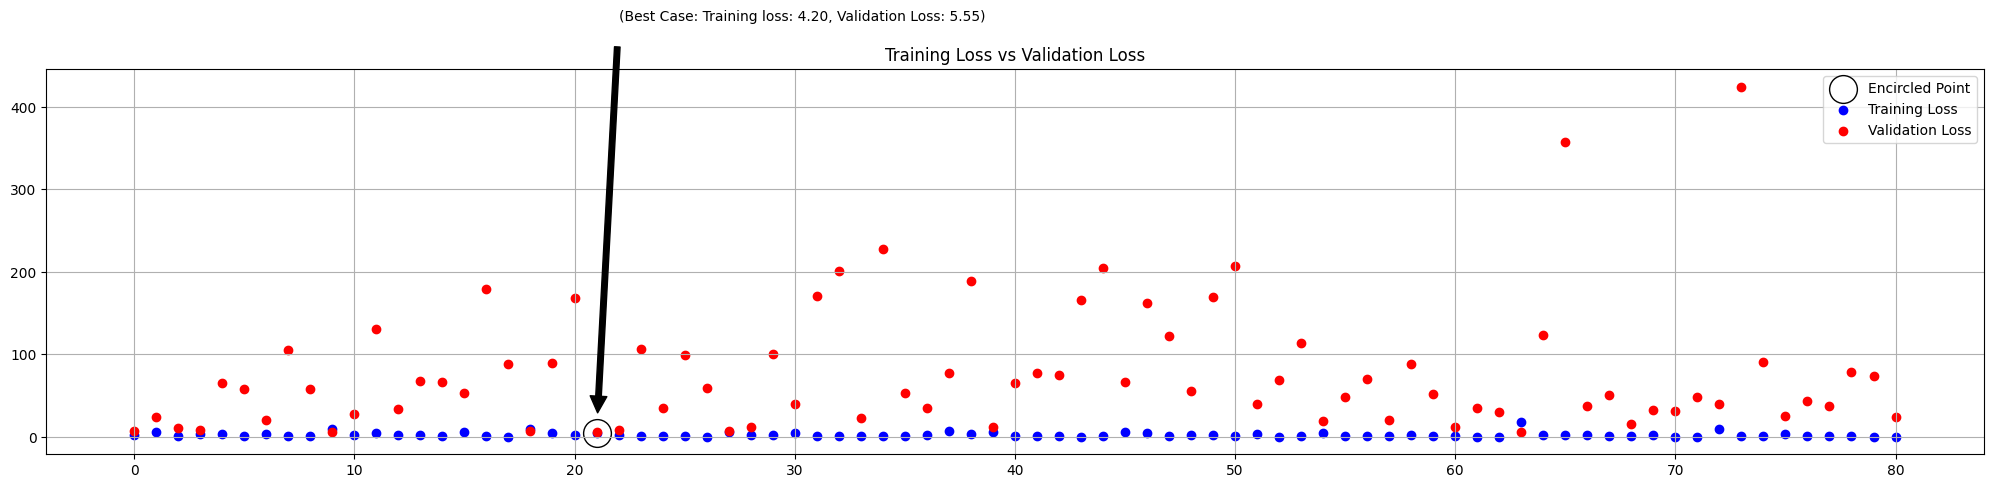

In [112]:
# Get the coordinates of the 3rd points
encircle_x_train = range(len(results_df["Training Loss"]))[best_params.index[0]]
best_y_train = results_df["Training Loss"][best_params.index[0]]
best_y_val = results_df["Validation Loss"][best_params.index[0]]

plt.subplots(figsize = (25,5))

#circling the best loss
plt.scatter(encircle_x_train, best_y_train, s=400, color='white', edgecolors='black', label="Encircled Point")


#plotting the losses
plt.scatter(range(len(results_df["Training Loss"])), results_df["Training Loss"], color = 'b', label = "Training Loss")
plt.scatter(range(len(results_df["Validation Loss"])), results_df["Validation Loss"], color = 'r', label = "Validation Loss")

# Annotate the third point with its coordinates
plt.annotate(f"(Best Case: Training loss: {best_y_train:.2f}, Validation Loss: {best_y_val:.2f})",
             xy=(encircle_x_train, best_y_train),
             xytext=(encircle_x_train + 1, best_y_train + 500),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)


plt.title("Training Loss vs Validation Loss")
plt.legend()

# plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

### Lets train the model using these hyperparams

In [113]:
alpha__ = best_params["Learning Rate"]
float(alpha__)

0.001

In [114]:
input_size__ = train_features.shape[1]  # Number of input features
hidden_size__ = 26
output_size__ = 2  # Two output variables

model_final = CreditModel(input_size__, hidden_size__, output_size__)

#setting the other hyperparams
iterations__ = 20000
batch_size__ = 50
epochs__ = int(iterations__/(int(train_features.shape[0])/batch_size__))


#moving the model to the gpu
model_final = model_final.to(device)
print(model_final)

# Cross Entropy Loss 
error__ = nn.MSELoss()

# SGD Optimizer
alpha__ = 0.001
optimizer__ = torch.optim.Adam(model_final.parameters(), lr=alpha__)

# data loader
train_loader__ = DataLoader(train, batch_size = batch_size__, shuffle = True)

CreditModel(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (prelu1): PReLU(num_parameters=1)
  (fc2): Linear(in_features=26, out_features=13, bias=True)
  (prelu2): ReLU()
  (fc3): Linear(in_features=13, out_features=2, bias=True)
)


In [115]:
count = 0
loss_list_ = []
iterations_ = []
pev_list_ = []

for epoch in range(epochs__):
    for train_feature, ground_truth_train in train_loader__:
        
        #moving the batch to GPU
        train_feature, ground_truth_train = train_feature.to(device), ground_truth_train.to(device)
        
        # Clear gradients
        optimizer__.zero_grad()
        
        # Forward propagation
        y_hat_train = model_final(train_feature)
        
        # Calculate loss
        weight = 0.5  # Relative weight for the first output
        loss = weight * error__(y_hat_train[:,0], ground_truth_train[:,0]) + (1. - weight) * error__(y_hat_train[:,1], ground_truth_train[:,1])
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer__.step()
        
        count += 1
        
        #for every 100 epochs, we will calculate the validation accuracy
        if count % 100 == 0:
            pev = 1.0 - (torch.var(ground_truth_train - y_hat_train) / torch.var(ground_truth_train))

            loss_list_.append(loss.data)
            iterations_.append(count)
            pev_list_.append(pev)
            if count%500 == 0:
                
                print(f"Iterations: {count} Training_loss: {loss.data} PEV:{pev} ")

Iterations: 500 Training_loss: 38.31428146362305 PEV:0.6303404569625854 
Iterations: 1000 Training_loss: 28.144418716430664 PEV:0.7072376012802124 
Iterations: 1500 Training_loss: 13.159930229187012 PEV:0.8446704745292664 
Iterations: 2000 Training_loss: 18.9423885345459 PEV:0.7841064929962158 
Iterations: 2500 Training_loss: 19.392004013061523 PEV:0.8350497484207153 
Iterations: 3000 Training_loss: 31.92026138305664 PEV:0.7114768624305725 
Iterations: 3500 Training_loss: 16.777814865112305 PEV:0.8532134890556335 
Iterations: 4000 Training_loss: 18.896203994750977 PEV:0.8091418147087097 
Iterations: 4500 Training_loss: 13.586139678955078 PEV:0.8723992109298706 
Iterations: 5000 Training_loss: 17.547739028930664 PEV:0.8696167469024658 
Iterations: 5500 Training_loss: 6.130064964294434 PEV:0.9530102610588074 
Iterations: 6000 Training_loss: 11.981605529785156 PEV:0.9138909578323364 
Iterations: 6500 Training_loss: 12.149415969848633 PEV:0.8484506607055664 
Iterations: 7000 Training_loss:

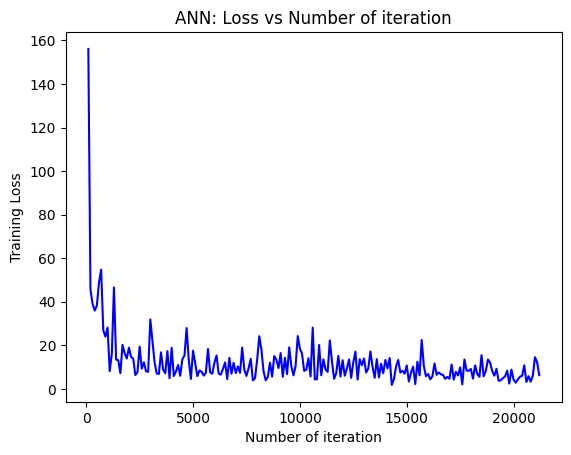

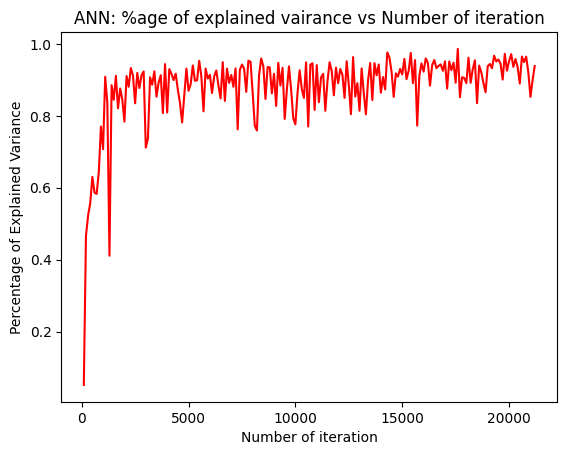

In [116]:
#tconverting into tensors to be able to plot
loss_list__ = torch.tensor(loss_list_, dtype=torch.float32).numpy()
pev_list__ = torch.tensor(pev_list_, dtype=torch.float32).numpy()
iterations__ = torch.tensor(iterations_, dtype = torch.float32).numpy()
# visualization loss 
plt.plot(iterations__, loss_list__, color = "blue")
plt.xlabel("Number of iteration")
plt.ylabel("Training Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iterations__, pev_list__,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Percentage of Explained Variance")
plt.title("ANN: %age of explained vairance vs Number of iteration")
plt.show()

In [118]:
val_loader = DataLoader(val, batch_size = val_features.shape[0], shuffle = True)
test_loader = DataLoader(test, batch_size = test_features.shape[0], shuffle = True)

In [119]:
#checking on test set
for test_feature, ground_truth_test in test_loader:
    test_feature, ground_truth_test = test_feature.to(device), ground_truth_test.to(device)
    y_hat_test = model_final(test_feature) #calculating the outputs for validation set
    weight = 0.5  # Relative weight for the first output
    loss_test = weight * error__(y_hat_test[:,0], ground_truth_test[:,0]) + (1. - weight) * error__(y_hat_test[:,1], ground_truth_test[:,1])
        

In [120]:
print(f"The loss of the test set is {loss_test}")

The loss of the test set is 18.336143493652344


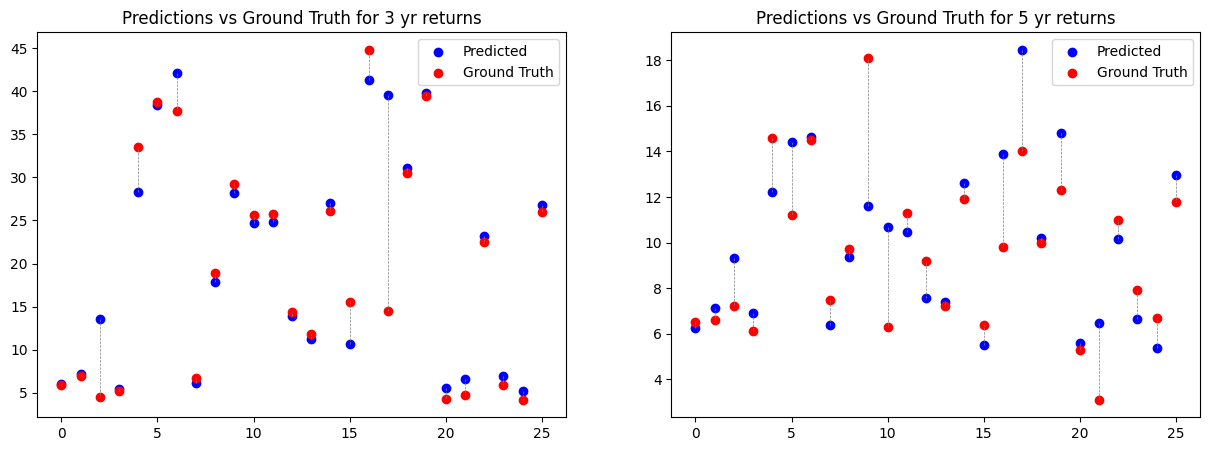

In [121]:
#converting to be able to plot
y_hat_test_ = torch.tensor(y_hat_test.data, dtype=torch.float32).cpu().numpy()
ground_truth_test_ = ground_truth_test.cpu().numpy()

plt.subplots(figsize = (15, 5))

#Plotting the first column of the outout and ground truth
plt.subplot(1,2,1)
plt.scatter(range(len(y_hat_test_)), y_hat_test_[:, 0], color="blue", label="Predicted")
plt.scatter(range(len(ground_truth_test_)), ground_truth_test_[:, 0], color="red", label="Ground Truth")
plt.legend()
plt.title("Predictions vs Ground Truth for 3 yr returns")

# Connect corresponding points with lines
for i in range(len(y_hat_test_)):
    plt.plot([i, i], [y_hat_test_[i, 0], ground_truth_test_[i, 0]], color="gray", linestyle="--", linewidth=0.5)


#Plotting the second column of the outout and ground truth
plt.subplot(1,2,2)
plt.scatter(range(len(y_hat_test_)), y_hat_test_[:, 1], color="blue", label="Predicted")
plt.scatter(range(len(ground_truth_test_)), ground_truth_test_[:, 1], color="red", label="Ground Truth")
plt.legend()
plt.title("Predictions vs Ground Truth for 5 yr returns")

# Connect corresponding points with lines
for i in range(len(y_hat_test_)):
    plt.plot([i, i], [y_hat_test_[i, 1], ground_truth_test_[i, 1]], color="gray", linestyle="--", linewidth=0.5)

## Although, there is a clear deviation from the ground truth in some cases, but I think most of the cases have done pretty good

In [122]:
!pip install torchview

### Below is a Graph depicting the architecture of the Model

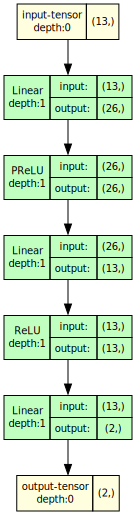

In [75]:
import torchvision
from torchview import draw_graph

model_graph = draw_graph(model_final,input_data = torch.tensor(x_train_norm[0], dtype = torch.float32), expand_nested=True)
model_graph.visual_graph